<a href="https://colab.research.google.com/github/Slippers3310/heart-disease/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HEART DISEASE


Loading dataset

In [8]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

# Automatically get the uploaded filename and read into df
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))



Saving heart_disease_uci.csv to heart_disease_uci (3).csv


1- Exploratory Data Analysis (EDA)

1-1 - Basic Statistics

In [9]:
df.dtypes



,0
id,int64
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64


1.1 _Basic Statistics

In [10]:
# Info & basic stats
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\nNumeric description:\n", df.describe())
print("\nCategorical description:\n", df.describe(include='object'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Missing values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30

1.2 - Visualizaiton

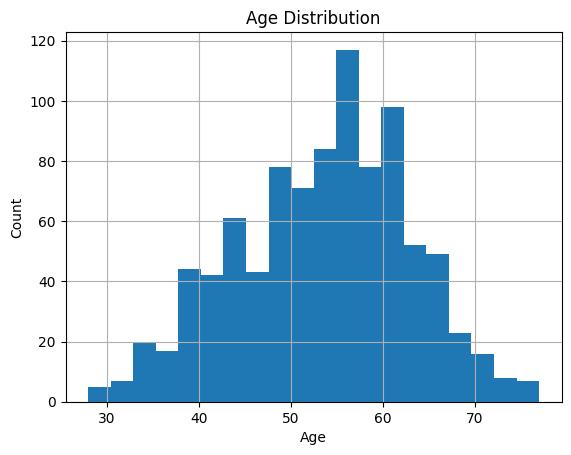

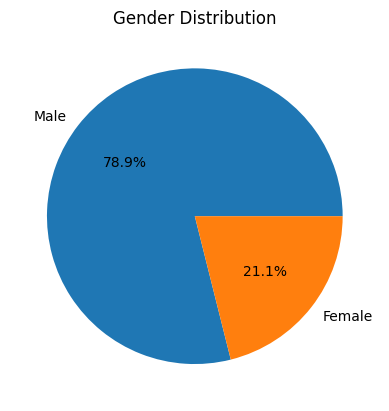

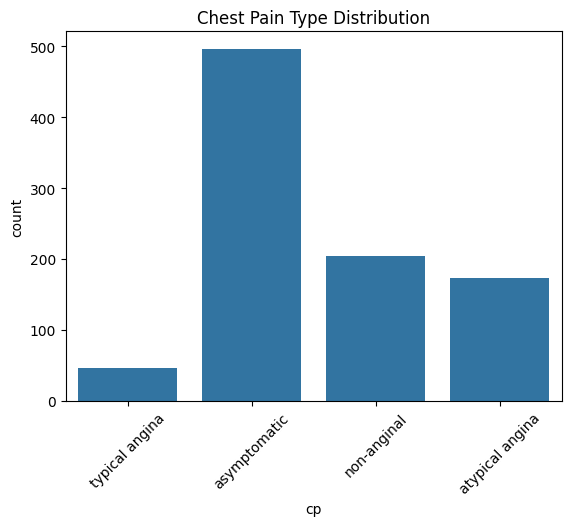

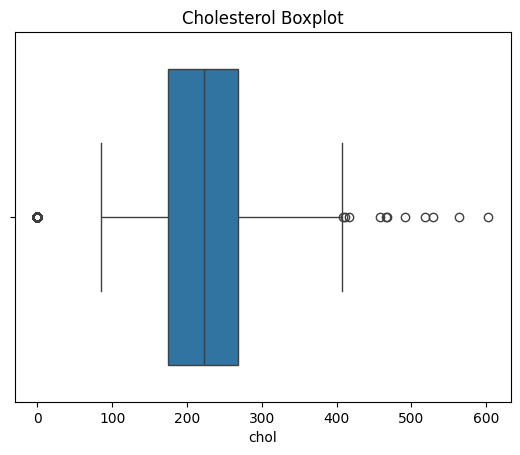

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram (age)
df['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Pie chart (sex)
df['sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Bar plot (chest pain type)
sns.countplot(x='cp', data=df)
plt.title('Chest Pain Type Distribution')
plt.xticks(rotation=45)
plt.show()

# Boxplot (cholesterol)
sns.boxplot(x=df['chol'])
plt.title('Cholesterol Boxplot')
plt.show()


1.3 - Handling missing values

In [12]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')


 2- PCA and T-SNE Visualization

2.1 Encode categorical columns

In [17]:
df_encoded = pd.get_dummies(df.drop(columns=['id']), drop_first=True)


 2.2 Standardize the data

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)


2.3 PCA 2D Visualization

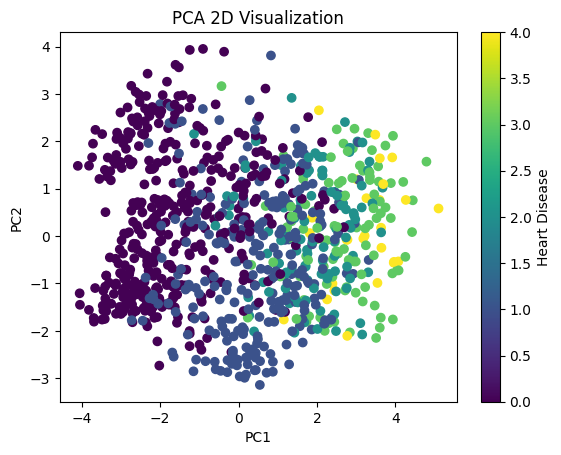

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['num'], cmap='viridis')
plt.title('PCA 2D Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Heart Disease')
plt.show()


2.4 T-SNE 2D Visualization

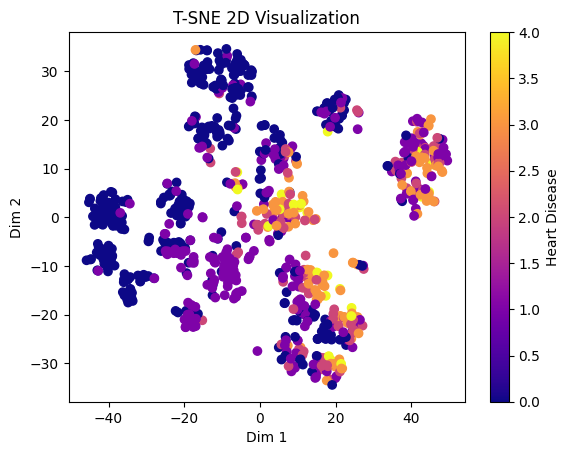

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_scaled)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['num'], cmap='plasma')
plt.title('T-SNE 2D Visualization')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.colorbar(label='Heart Disease')
plt.show()

 3 PCA Variance Analysis


3.1 PCA for many components

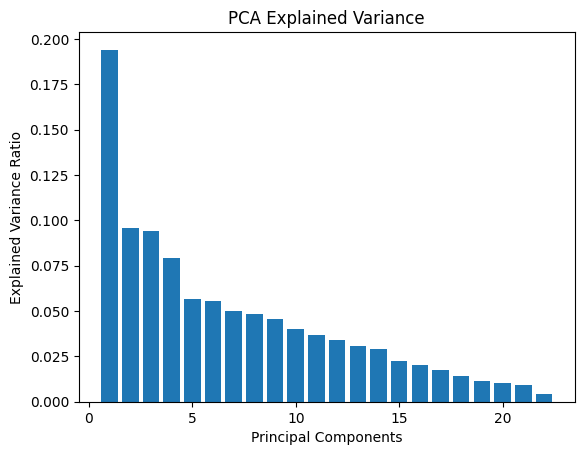

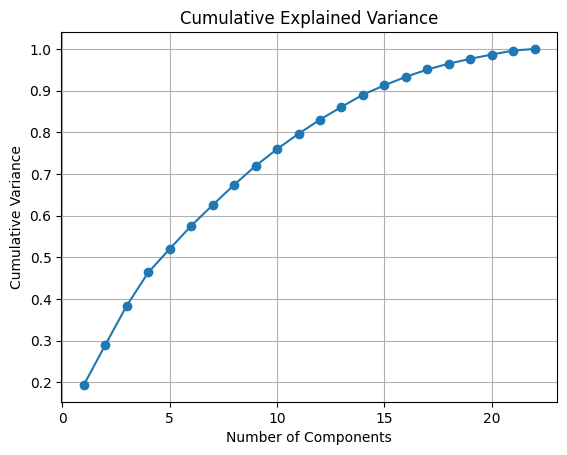

In [21]:
pca_full = PCA()
pca_full.fit(df_scaled)

# Explained variance
explained_var = pca_full.explained_variance_ratio_

# Bar plot
plt.bar(range(1, len(explained_var)+1), explained_var)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

# Cumulative variance
cumulative = explained_var.cumsum()
plt.plot(range(1, len(cumulative)+1), cumulative, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid()
plt.show()


4- Classification Data

4.1 Splitting Data

In [22]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4.2 Reduce dimensions using PCA

In [23]:
pca = PCA(n_components=10)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)


4.3 Train 3 Classifiers (Original + PCA version)


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_and_evaluate(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    print(f"Accuracy: {accuracy_score(y_te, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))
    print("Classification Report:\n", classification_report(y_te, y_pred))

Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression

print("🔹 Logistic Regression (Original):")
train_and_evaluate(LogisticRegression(max_iter=1000), X_train, X_test, y_train, y_test)

print("🔹 Logistic Regression (PCA):")
train_and_evaluate(LogisticRegression(max_iter=1000), X_pca_train, X_pca_test, y_train, y_test)


🔹 Logistic Regression (Original):


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy: 0.6304
Confusion Matrix:
 [[69  5  1  0  0]
 [19 32  2  1  0]
 [ 4 10  3  8  0]
 [ 0  7  7 12  0]
 [ 1  0  1  2  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.92      0.82        75
         1.0       0.59      0.59      0.59        54
         2.0       0.21      0.12      0.15        25
         3.0       0.52      0.46      0.49        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.63       184
   macro avg       0.41      0.42      0.41       184
weighted avg       0.58      0.63      0.60       184

🔹 Logistic Regression (PCA):
Accuracy: 0.6522
Confusion Matrix:
 [[68  6  1  0  0]
 [17 35  1  1  0]
 [ 1 14  4  6  0]
 [ 0  7  6 13  0]
 [ 1  0  0  3  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        75
         1.0       0.56      0.65      0.60        54
         2.0     

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Decision trees

In [26]:
from sklearn.tree import DecisionTreeClassifier

print("🔹 Decision Tree (Original):")
train_and_evaluate(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

print("🔹 Decision Tree (PCA):")
train_and_evaluate(DecisionTreeClassifier(), X_pca_train, X_pca_test, y_train, y_test)


🔹 Decision Tree (Original):
Accuracy: 0.6630
Confusion Matrix:
 [[67  6  0  2  0]
 [14 32  7  1  0]
 [ 2  7 10  3  3]
 [ 1  2  7 13  3]
 [ 0  1  1  2  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84        75
         1.0       0.67      0.59      0.63        54
         2.0       0.40      0.40      0.40        25
         3.0       0.62      0.50      0.55        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.66       184
   macro avg       0.50      0.48      0.48       184
weighted avg       0.66      0.66      0.66       184

🔹 Decision Tree (PCA):
Accuracy: 0.5543
Confusion Matrix:
 [[60 11  3  1  0]
 [12 25  8  9  0]
 [ 4 11  5  3  2]
 [ 1  9  4 10  2]
 [ 0  0  0  2  2]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.80      0.79        75
         1.0       0.45      0.46      0.45      

Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

print("🔹 Random Forest (Original):")
train_and_evaluate(RandomForestClassifier(), X_train, X_test, y_train, y_test)

print("🔹 Random Forest (PCA):")
train_and_evaluate(RandomForestClassifier(), X_pca_train, X_pca_test, y_train, y_test)


🔹 Random Forest (Original):
Accuracy: 0.6739
Confusion Matrix:
 [[69  5  1  0  0]
 [17 31  3  3  0]
 [ 2 13  8  2  0]
 [ 1  5  3 16  1]
 [ 0  1  1  2  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.92      0.84        75
         1.0       0.56      0.57      0.57        54
         2.0       0.50      0.32      0.39        25
         3.0       0.70      0.62      0.65        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.67       184
   macro avg       0.51      0.49      0.49       184
weighted avg       0.65      0.67      0.66       184

🔹 Random Forest (PCA):
Accuracy: 0.6033
Confusion Matrix:
 [[70  5  0  0  0]
 [16 33  3  2  0]
 [ 2 17  2  3  1]
 [ 1 15  4  6  0]
 [ 1  0  0  3  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        75
         1.0       0.47      0.61      0.53      